In [38]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
file_path = ".\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\test images\\20240528_080608"
print(f"File path: {file_path}")


File path: .\Users\LENOVO\Desktop\project\image classification using svc\model\test images\20240528_080608


In [40]:
img = cv2.imread("C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\test images\\20240528_080608.jpg")
img.shape


(3632, 1676, 3)

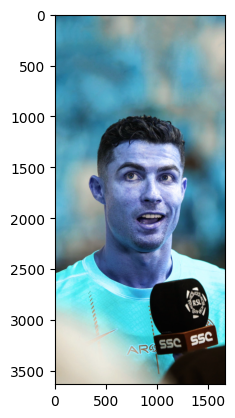

In [41]:
plt.imshow(img)

In [42]:
grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grey.shape

(3632, 1676)

In [43]:
grey

array([[ 94,  94,  94, ..., 146, 146, 146],
       [ 94,  94,  95, ..., 147, 147, 147],
       [ 94,  94,  95, ..., 148, 148, 148],
       ...,
       [183, 183, 183, ...,   9,  10,  10],
       [183, 183, 183, ...,   9,  10,  10],
       [183, 183, 183, ...,   9,  10,  10]],
      shape=(3632, 1676), dtype=uint8)

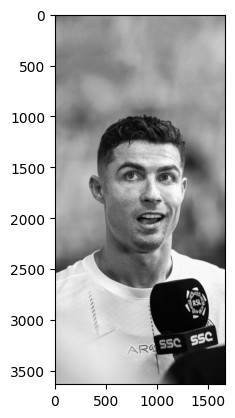

In [44]:
plt.imshow(grey,cmap="grey")

In [45]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\LENOVO\Desktop\project\image classification using svc\model\opencv\harcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\LENOVO\Desktop\project\image classification using svc\model\opencv\harcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grey, 1.3, 5)
faces

array([[ 439, 1196, 1001, 1001]], dtype=int32)

In [46]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(439), np.int32(1196), np.int32(1001), np.int32(1001))

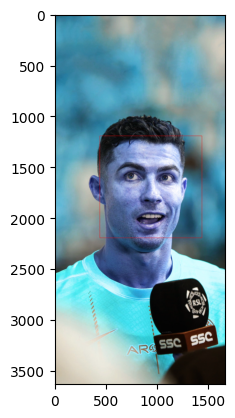

In [47]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

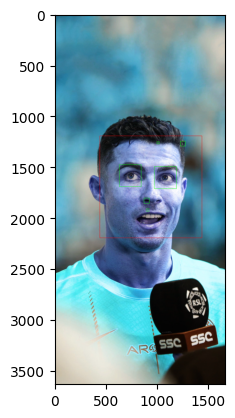

In [48]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey=grey[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_grey)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

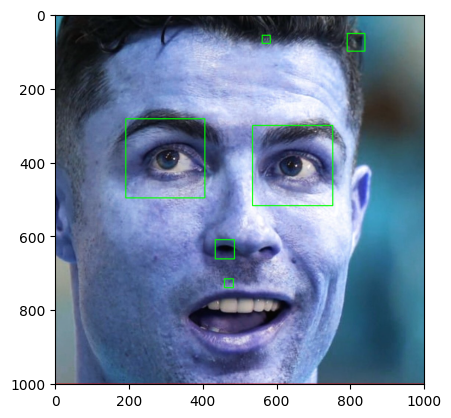

In [49]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [50]:
def get_cropped_image_if_2_eyes(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if img is None:
        print(f"Warning: Unable to load image: {image_path}")
        return None

    try:
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x, y, w, h) in faces:
            # Crop the face region
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            # Detect eyes in the cropped face region
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:  # Ensure at least 2 eyes are detected
                return roi_color

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

    # Return None if no face with 2 eyes is found
    return None


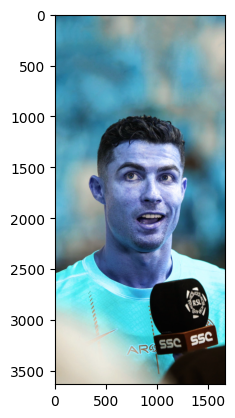

In [51]:
orginal_image=cv2.imread("C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\test images\\20240528_080608.jpg")
plt.imshow(orginal_image)

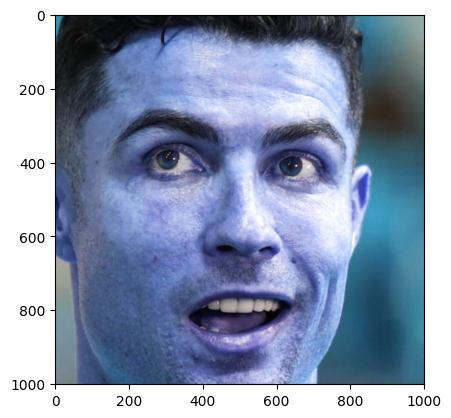

In [52]:
cropped_img=get_cropped_image_if_2_eyes("C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\test images\\20240528_080608.jpg")
plt.imshow(cropped_img)


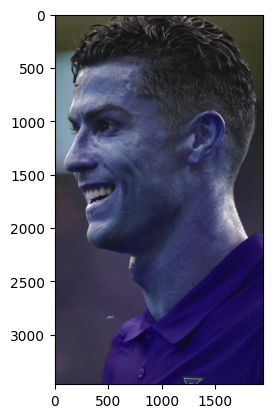

In [53]:
obstructed_image=cv2.imread("C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\test images\\PicsArt_06-10-07.49.14_polarr.jpg")
plt.imshow(obstructed_image)

In [54]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\test images\\PicsArt_06-10-07.49.14_polarr.jpg")
cropped_image_no_2_eyes

In [55]:
path_to_data = r"C:\Users\LENOVO\Desktop\project\image classification using svc\model\dataset"
path_to_cr_data = r"C:\Users\LENOVO\Desktop\project\image classification using svc\model\dataset/cropped/"


In [56]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [57]:
img_dirs

['C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset\\Antoine Griezmann',
 'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset\\cristano ronaldo',
 'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset\\cropped',
 'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset\\leo messi',
 'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset\\Mohamed Salah',
 'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset\\neymer']

In [58]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [59]:
import os
import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)  # Use os.path.basename for cross-platform compatibility
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file():  # Ensure it's a file
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                # Use os.path.join to construct paths properly
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                
                # Create the folder if it doesn't exist
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)
                
                # Construct cropped file path
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                # Save the cropped image
                cv2.imwrite(cropped_file_path, roi_color)
                
                # Track the file in the dictionary
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1


Generating cropped images in folder: C:\Users\LENOVO\Desktop\project\image classification using svc\model\dataset/cropped/Antoine Griezmann
Generating cropped images in folder: C:\Users\LENOVO\Desktop\project\image classification using svc\model\dataset/cropped/cristano ronaldo
Generating cropped images in folder: C:\Users\LENOVO\Desktop\project\image classification using svc\model\dataset/cropped/leo messi
Generating cropped images in folder: C:\Users\LENOVO\Desktop\project\image classification using svc\model\dataset/cropped/Mohamed Salah
Generating cropped images in folder: C:\Users\LENOVO\Desktop\project\image classification using svc\model\dataset/cropped/neymer


WAVELET TRANSFORM

In [60]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [61]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

NameError: name 'pywt' is not defined

In [29]:
celebrity_file_names_dict

{'Antoine Griezmann': ['C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann1.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann2.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann3.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann4.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann5.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann6.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann7.png',
  'C:\

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Antoine Griezmann': ['C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann1.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann10.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann11.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann12.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann13.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann14.png',
  'C:\\Users\\LENOVO\\Desktop\\project\\image classification using svc\\model\\dataset/cropped/Antoine Griezmann\\Antoine Griezmann15.png',


In [31]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Antoine Griezmann': 0,
 'cristano ronaldo': 1,
 'leo messi': 2,
 'Mohamed Salah': 3,
 'neymer': 4}

In [ ]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_image=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_har_image=cv2.resize(img_har,(32,32))
        combined_image=np.vstack((scaled_raw_image.reshape((32*32*3),1),scaled_har_image.reshape(32*32,1)))
        x.append(combined_image)
        y.append(class_dict[celebrity_name])

NameError: name 'pywt' is not defined

In [ ]:
len(x[0])

IndexError: list index out of range

TO REDUCE ERROR ,ITS BETTER TO CONVERT THEM INTO FLOAT

In [138]:
X = np.array(x).reshape(len(x),4096).astype(float)
X.shape

(216, 4096)

DATA CLEANING

SVM (SUPPORT VECTOR MACHINE)

In [139]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Pipeline is a sequence of steps or stages that are executed in a specific order

->'scaler': This step uses the StandardScaler to standardize the features in your data.

->'svc': This step uses the SVC (Support Vector Classifier) with a Radial Basis Function (RBF) kernel and a penalty parameter C set to 10

In [141]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

In [142]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [143]:
pipe.score(X_test,y_test)

0.7037037037037037

In [144]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.70      0.84      0.76        19
           2       0.67      0.67      0.67        15
           3       1.00      0.67      0.80         3
           4       0.83      0.62      0.71         8

    accuracy                           0.70        54
   macro avg       0.76      0.67      0.71        54
weighted avg       0.71      0.70      0.70        54



GRIDSEARCH CV   

->TO TUNE THE MODEL AT GET THE BEST MODEL OUT OF IT

In [145]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [146]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [148]:
scores = []
best_estimators = {}
import pandas as pd
for i, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': i,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[i] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, 

,model,best_score,best_params
0,svm,0.789583,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.548106,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.765341,{'logisticregression__C': 1}


In [150]:
best_estimators['svm'].score(X_test,y_test)

0.7962962962962963

In [151]:
best_estimators['random_forest'].score(X_test,y_test)

0.5555555555555556

In [152]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8148148148148148

In [153]:
best_clf=best_estimators['svm']

In [154]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 5,  1,  2,  0,  1],
       [ 1, 18,  0,  0,  0],
       [ 0,  4, 10,  0,  1],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  7]])

<function matplotlib.pyplot.show(close=None, block=None)>

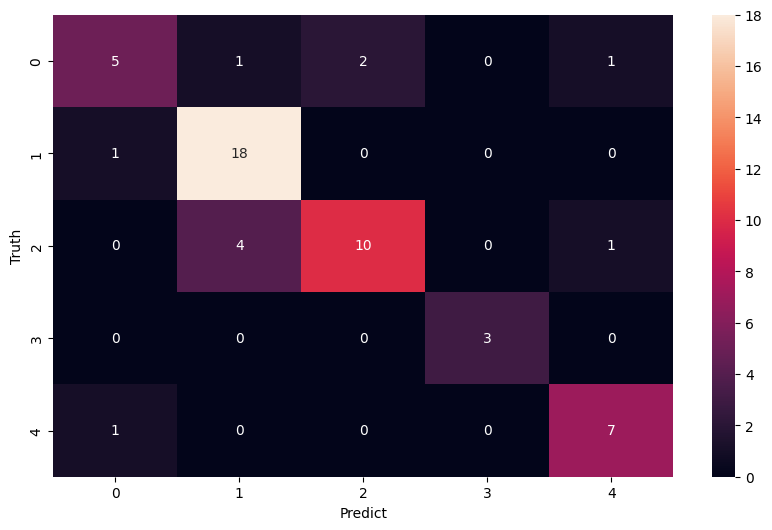

In [159]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show

TO SAVE THE MODEL HERE  JOBLIB USED

In [160]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

Save class dictionary

In [161]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))